In [1]:
import numpy as np

In [2]:
import pandas as pd

In [102]:
data = pd.read_csv('titanic_MD.csv')

# Parte 1:

### 1.1. Missing data para todas las columnas

#### Exploración de la data
Visualización previa sobre la forma de la data.

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


La data no es muy grande, tiene 12 columnas y 183 observaciones.

In [104]:
print('Data shape: ', data.shape)

Data shape:  (183, 12)


In [105]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


#### Missing data
Se buscan los valores NA en todas las columnas de la data.

In [106]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Al buscar los valores de algunas de las columnas se observa que algunas columnas como Sex existen missing data diferentes a NA.

In [107]:
data['Sex'].unique()

array(['?', 'female', 'male'], dtype=object)

In [108]:
data['Age'].unique()

array([38.  , 35.  , 54.  ,   nan, 58.  , 34.  , 19.  , 49.  , 65.  ,
       45.  , 29.  , 25.  , 46.  , 71.  , 23.  , 21.  , 47.  , 24.  ,
       37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  3.  , 44.  ,  2.  ,
       40.  , 31.  , 32.  , 62.  , 30.  , 52.  , 63.  , 36.  ,  0.92,
       17.  , 18.  , 16.  , 41.  , 60.  , 27.  , 33.  , 28.  , 14.  ,
       64.  ,  4.  , 48.  , 55.  , 39.  , 53.  , 80.  , 15.  , 42.  ,
       70.  ,  6.  , 51.  , 43.  , 11.  ])

In [109]:
data['SibSp'].unique()

array([ 1.,  0., nan,  3.,  2.])

In [110]:
data['Parch'].unique()

array([ 0., nan,  2.,  1.,  4.])

In [111]:
data['Fare'].unique()

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792,  83.475 ,  10.5   ,
            nan,  61.175 ,  34.6542,  63.3583,  77.2875,  52.    ,
       247.5208,  26.2833,  79.2   ,  26.    ,  66.6   ,  33.5   ,
        30.6958,  28.7125,  39.    ,  27.7208, 146.5208,  10.4625,
        31.    , 113.275 ,  90.    ,  52.5542,  79.65  ,   0.    ,
       153.4625, 135.6333,  29.7   ,  77.9583,  91.0792,  12.875 ,
       151.55  , 108.9   ,  56.9292,  83.1583, 262.375 , 164.8667,
       134.5   ,  57.9792,  28.5   ,  55.    ,  75.25  ,  69.3   ,
        55.4417, 211.5   , 120.    ,   8.05  ,  55.9   ,  81.8583,
        30.5   ,  27.75  ,  89.1042,  38.5   ,  13.7917,  78.2667,
        86.5   ,  26.2875,  34.0208,  93.5   ,  49.5   ,  71.    ,
       106.425 , 110.8833,  39.6   ,  51.4792,  26.3875,  40.125 ,
        32.3208,  30.    ,  25.5875, 512.3292, 211.3375,  57.    ,
         7.65  , 227.525 ,  49.5042,  78.85  ,  12.475 ,  25.9

In [112]:
data['Embarked'].unique()

array(['C', 'S', nan, 'Q'], dtype=object)

Por lo tanto, se buscan en las columnas de tipo object valores que no coincidan con el formato. ('?')

In [113]:
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


Se remplazan los valores missing por NA para tener una mejor visualización sobre el total de missing data existente.

In [114]:
data.replace(r'\?', np.nan, regex = True, inplace = True)

Ahora si, estas son las columnas sobre las que se conoce que tienen missing data.

In [115]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

<AxesSubplot: >

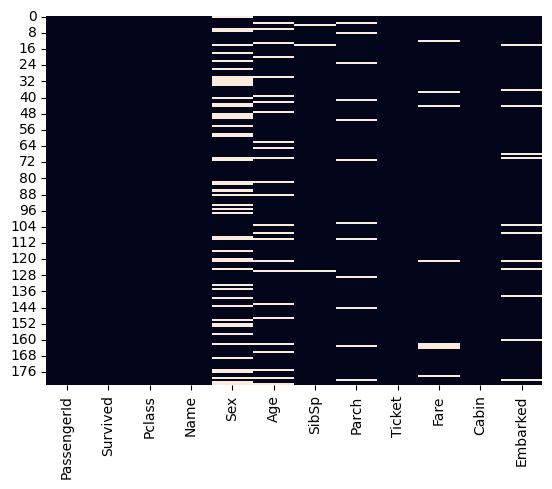

In [17]:
import seaborn as sns
sns.heatmap(data.isna(), cbar=False)

Visualización completa de los missing values.

### 1.2.	Para cada columna especificar qué tipo de modelo se utilizará (nombre y el porqué) y qué valores se le darán a todos los missing values. 

Para la columna 'Sex' y 'Embarked', haría una imputación por la moda. Esto porque es una variable categórica y porque no es posible hacerlo por el promedio o la mediana. 

Para la columna 'Age', haría una imputación por la media. Esto porque es una variable numérica que podría ser más adecuada ya que la data es extensa. Sin embargo, hay que capear el valor a un número exacto ya que con la media es probable que queden valores decimales.

Para la columna 'SibSp' y 'Parch', sería una imputación por la mediana. Ya que no sería tan exacta por medio del promedio.

Para la columna 'Fare', sería una imputación por la media. Esto porque es una variable que puede ser decimal y permite un poco más de flexiblidad en tanto al valor de los datos.

### 1.3.	Filas completas

La data tienen un total de 183 observaciones. Sin embargo, al hacer dropna general de las observaciones que son missing data, se reducen a 100 observaciones en total.

In [18]:
data.shape

(183, 12)

In [19]:
data.dropna().shape

(100, 12)

Por lo tanto, se pierde aproximadamente el 45% de la data.

In [20]:
data2 = data.dropna()
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,467.120000,0.620000,1.160000,36.124200,0.44000,0.480000,74.445126
std,230.014944,0.487832,0.465366,15.123837,0.53786,0.731402,65.975260
min,4.000000,0.000000,1.000000,0.920000,0.00000,0.000000,0.000000
25%,316.750000,0.000000,1.000000,24.000000,0.00000,0.000000,31.990600
50%,480.500000,1.000000,1.000000,36.000000,0.00000,0.000000,59.979200
75%,649.500000,1.000000,1.000000,48.250000,1.00000,1.000000,90.000000
max,868.000000,1.000000,3.000000,71.000000,2.00000,2.000000,512.329200


En general, el promedio de varios columnas numéricas aumenta pero así como Survived, se reduce al igual que SibSp y Fare.

### 1.4.	Utilizar los siguientes métodos para cada columna que contiene missing values:
a.	Imputación general (media, moda y mediana)

b.	Modelo de regresión lineal

c.	Outliers: Uno de los dos métodos vistos en clase (Standard deviation approach o Percentile approach)


#### 1.4.1. Imputación general (media, moda y mediana)

In [21]:
dataImput = data

Imputación por moda

In [23]:
dataImput['Sex'].fillna(dataImput['Sex'].mode()[0], inplace=True)

In [24]:
print("Comprobación de los missing values luego de realizar la imputación por la moda en Sex: " + 
      str(dataImput['Sex'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la moda en Sex: 0


Imputación por promedio

In [25]:
dataImput['Age'].fillna(int(dataImput['Age'].mean()), inplace=True)

In [26]:
print("Comprobación de los missing values luego de realizar la imputación por la media en Age: " + 
      str(dataImput['Age'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la media en Age: 0


Imputación por mediana

In [27]:
dataImput['SibSp'].fillna(dataImput['SibSp'].median(), inplace=True)

In [28]:
print("Comprobación de los missing values luego de realizar la imputación por la mediana en SibSp: " + 
      str(dataImput['SibSp'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la mediana en SibSp: 0


Imputación por mediana

In [29]:
dataImput['Parch'].fillna(dataImput['Parch'].median(), inplace=True)

In [30]:
print("Comprobación de los missing values luego de realizar la imputación por la mediana en Parch: " + 
      str(dataImput['Parch'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la mediana en Parch: 0


Imputación por promedio

In [31]:
dataImput['Fare'].fillna(dataImput['Fare'].mean(), inplace=True)

In [32]:
print("Comprobación de los missing values luego de realizar la imputación por la media en Fare: " + 
      str(dataImput['Fare'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la media en Fare: 0


Imputación por moda

In [33]:
dataImput['Embarked'].fillna(dataImput['Embarked'].mode()[0], inplace=True)

In [34]:
print("Comprobación de los missing values luego de realizar la imputación por la moda en Embarked: " + 
      str(dataImput['Embarked'].isna().sum()))

Comprobación de los missing values luego de realizar la imputación por la moda en Embarked: 0


Verificación de las imputación y los missing values generales

In [35]:
dataImput.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### 1.4.2.	Modelo de regresión lineal

In [36]:
dataRegresion = dataImput #copia de la data original para los modelos

In [39]:
corr = dataRegresion.corr()

C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\1508623809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataRegresion.corr()


In [40]:
corr.style.background_gradient (cmap = 'coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,-0.044178,-0.076814,-0.053973,0.021501
Survived,0.148495,1.000000,-0.034542,-0.243127,0.112707,-0.017392,0.116995
Pclass,-0.089136,-0.034542,1.000000,-0.244755,-0.097364,0.041823,-0.291042
Age,-0.044178,-0.243127,-0.244755,1.000000,-0.086812,-0.262361,-0.120752
SibSp,-0.076814,0.112707,-0.097364,-0.086812,1.000000,0.222056,0.298478
Parch,-0.053973,-0.017392,0.041823,-0.262361,0.222056,1.000000,0.365063
Fare,0.021501,0.116995,-0.291042,-0.120752,0.298478,0.365063,1.000000


Matriz de correlación para determinar las relaciones de las variables en los modelos.

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
dataRegresion = dataRegresion.dropna()

##### Modelo de Regresión Lineal para Age

In [43]:
lm = LinearRegression()
lm = lm.fit(dataRegresion[['Pclass']], dataRegresion['Age'])
lm

LinearRegression()

In [44]:
dataRegresion['Age_lm'] = lm.predict(dataRegresion[['Pclass']])

Weight avg without prediction: 35.6


C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\2854793466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

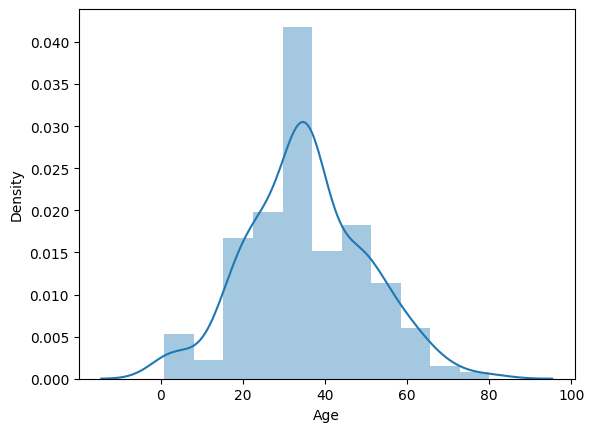

In [45]:
print('Weight avg without prediction:', round(dataRegresion['Age'].mean(),2))
sns.distplot(dataRegresion['Age'])

In [46]:
import matplotlib.pyplot as plt

Weight avg after prediction: 35.6
y_hat = 43.82 + -6.9x


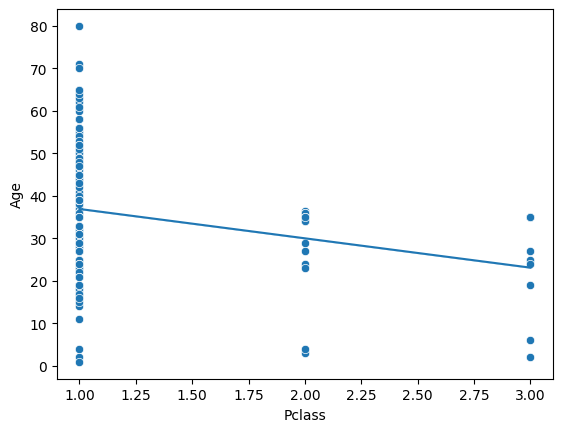

C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\57067783.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Age_lm'])


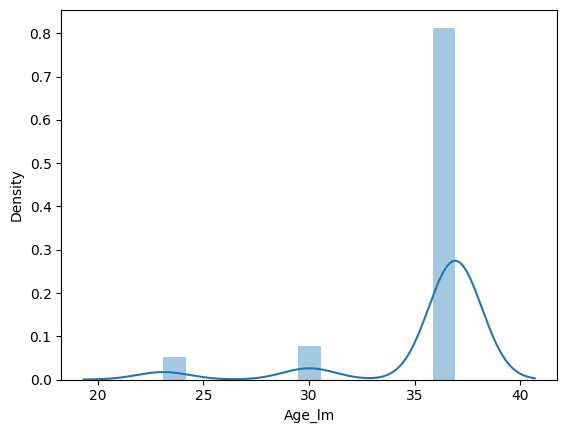

In [47]:
print('Weight avg after prediction:', round(dataRegresion['Age_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = dataRegresion['Pclass'], y = dataRegresion['Age'])
sns.lineplot(x = dataRegresion['Pclass'], y = lm.intercept_ + (lm.coef_ * dataRegresion['Pclass']))
plt.ylabel('Age')
plt.show()
sns.distplot(dataRegresion['Age_lm'])
plt.show()

##### Modelo de regresión lineal para Fare

In [48]:
lm = LinearRegression()
lm = lm.fit(dataRegresion[['Age']], dataRegresion['Fare'])
lm

LinearRegression()

In [49]:
dataRegresion['Fare_lm'] = lm.predict(dataRegresion[['Age']])

Weight avg without prediction: 78.96


C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\2612356923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

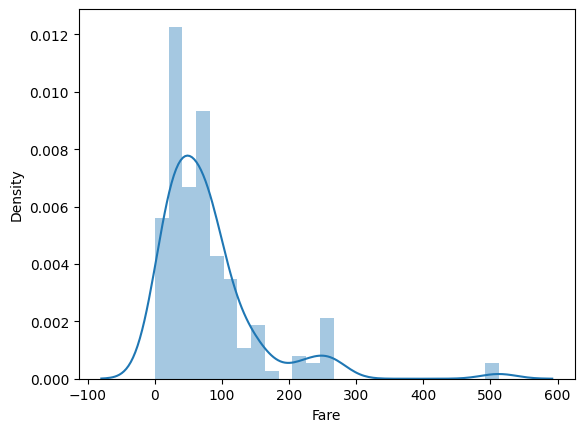

In [50]:
print('Weight avg without prediction:', round(dataRegresion['Fare'].mean(),2))
sns.distplot(dataRegresion['Fare'])

Weight avg after prediction: 78.96
y_hat = 101.24 + -0.63x


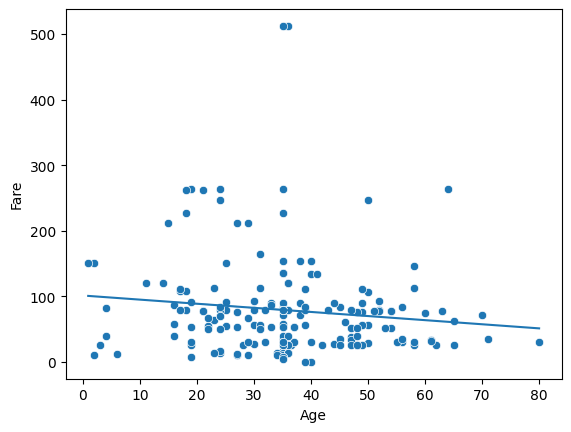

C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\2027486139.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Fare_lm'])


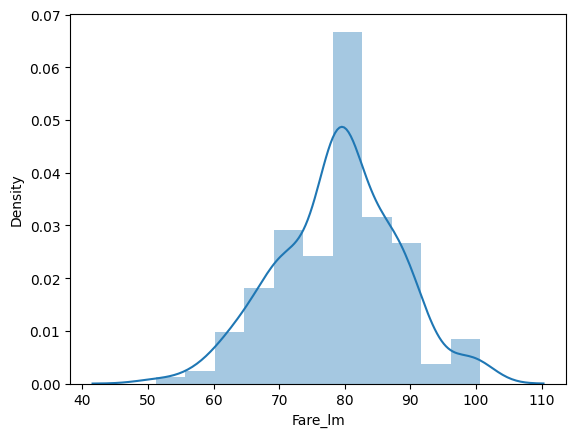

In [51]:
print('Weight avg after prediction:', round(dataRegresion['Fare_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = dataRegresion['Age'], y = dataRegresion['Fare'])
sns.lineplot(x = dataRegresion['Age'], y = lm.intercept_ + (lm.coef_ * dataRegresion['Age']))
plt.ylabel('Fare')
plt.show()
sns.distplot(dataRegresion['Fare_lm'])
plt.show()

##### Modelo de regresión lineal para SibSp

In [52]:
lm = LinearRegression()
lm = lm.fit(dataRegresion[['Fare']], dataRegresion['SibSp'])
lm

LinearRegression()

In [53]:
dataRegresion['SibSp_lm'] = lm.predict(dataRegresion[['SibSp']])

C:\Users\yanet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SibSp
Feature names seen at fit time, yet now missing:
- Fare

  warnings.warn(message, FutureWarning)


Weight avg without prediction: 0.45


C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\2810548822.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['SibSp'])


<AxesSubplot: xlabel='SibSp', ylabel='Density'>

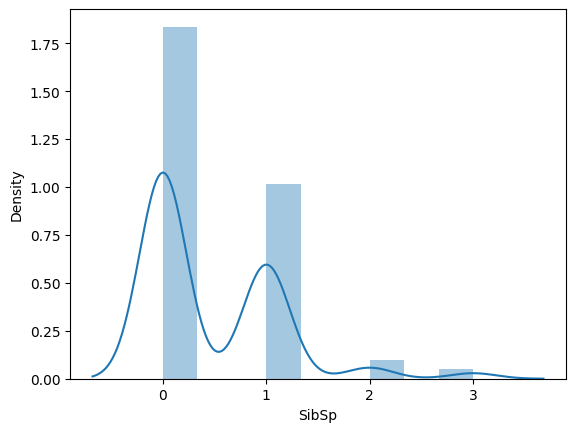

In [54]:
print('Weight avg without prediction:', round(dataRegresion['SibSp'].mean(),2))
sns.distplot(dataRegresion['SibSp'])

Weight avg after prediction: 0.25
y_hat = 0.25 + 0.0x


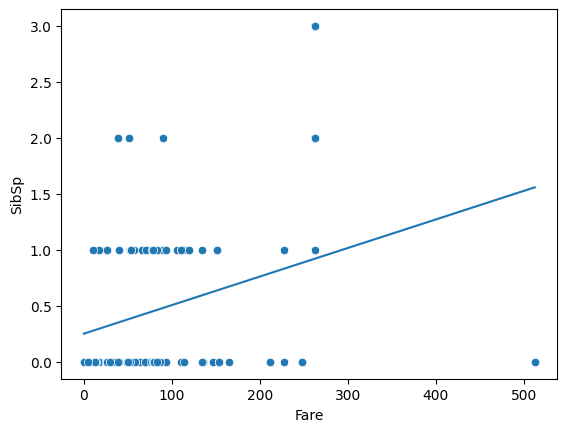

C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\4218589052.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['SibSp_lm'])


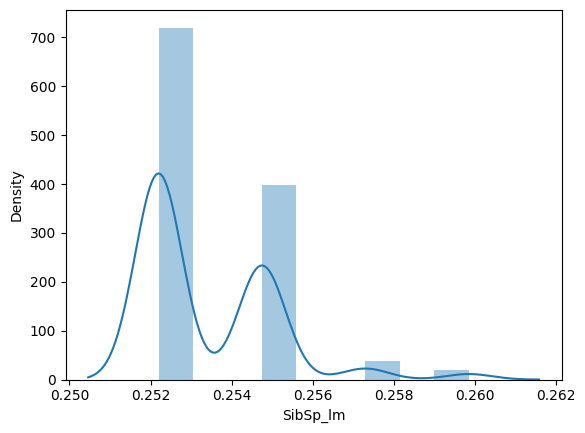

In [55]:
print('Weight avg after prediction:', round(dataRegresion['SibSp_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = dataRegresion['Fare'], y = dataRegresion['SibSp'])
sns.lineplot(x = dataRegresion['Fare'], y = lm.intercept_ + (lm.coef_ * dataRegresion['Fare']))
plt.ylabel('SibSp')
plt.show()
sns.distplot(dataRegresion['SibSp_lm'])
plt.show()

##### Modelo de regresión lineal para Parch

In [56]:
lm = LinearRegression()
lm = lm.fit(dataRegresion[['Fare']], dataRegresion['Parch'])
lm

LinearRegression()

In [57]:
dataRegresion['Parch_lm'] = lm.predict(dataRegresion[['Fare']])

Weight avg without prediction: 0.43


C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\1664732424.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Parch'])


<AxesSubplot: xlabel='Parch', ylabel='Density'>

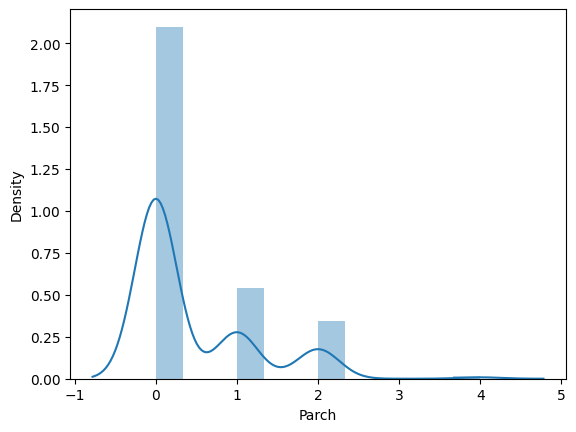

In [58]:
print('Weight avg without prediction:', round(dataRegresion['Parch'].mean(),2))
sns.distplot(dataRegresion['Parch'])

Weight avg after prediction: 0.43
y_hat = 0.15 + 0.0x


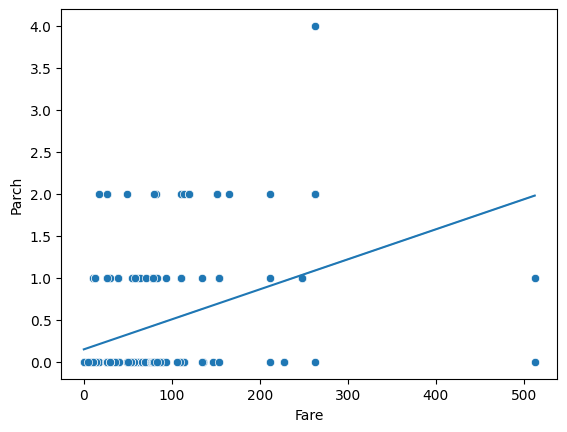

C:\Users\yanet\AppData\Local\Temp\ipykernel_2448\3303316301.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataRegresion['Parch_lm'])


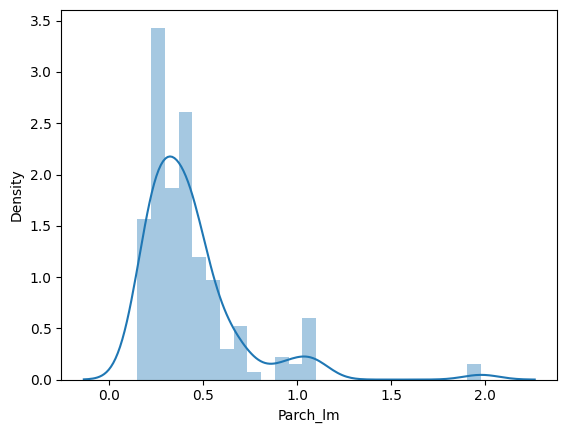

In [59]:
print('Weight avg after prediction:', round(dataRegresion['Parch_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = dataRegresion['Fare'], y = dataRegresion['Parch'])
sns.lineplot(x = dataRegresion['Fare'], y = lm.intercept_ + (lm.coef_ * dataRegresion['Fare']))
plt.ylabel('Parch')
plt.show()
sns.distplot(dataRegresion['Parch_lm'])
plt.show()

#### 1.4.3.	Outliers: Uno de los dos métodos vistos en clase (Standard deviation approach y Percentile approach)

In [60]:
dataOut = dataRegresion #copia de la data original para esta prueba

In [61]:
dataOut = dataOut.dropna()

##### Standard deviation approach - Age

In [62]:
f = 2
xl = dataOut['Age'].mean() - (dataOut['Age'].std() * f)
xu = dataOut['Age'].mean() + (dataOut['Age'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 6.540091199888543
Upper value: 64.65575579464698


<AxesSubplot: xlabel='PassengerId', ylabel='Age'>

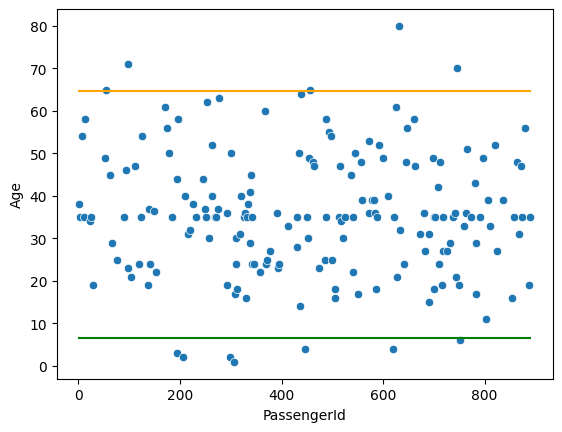

In [63]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Age'])
sns.lineplot(x = dataOut['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dataOut['PassengerId'], y = xu, color = 'orange')

In [64]:
df_sd = dataOut[(dataOut['Age']>=xl) & (dataOut['Age']<=xu)]

df_sd[['Age']].describe()

,Age
count,171.000000
mean,35.915205
std,12.094729
min,11.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,64.000000


In [65]:
dataOut['Age_sd'] = np.where(
    dataOut['Age']<xl,
    xl,
    np.where(
        dataOut['Age']>xu,
        xu,
        dataOut['Age']
    )
)
dataOut[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,183.000000,183.000000
mean,35.597923,35.576827
std,14.528916,13.870960
min,0.920000,6.540091
25%,25.000000,25.000000
50%,35.000000,35.000000
75%,46.500000,46.500000
max,80.000000,64.655756


##### Standard deviation approach - Fare

In [66]:
f = 2
xl = dataOut['Fare'].mean() - (dataOut['Fare'].std() * f)
xu = dataOut['Fare'].mean() + (dataOut['Fare'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -71.66964557180012
Upper value: 229.58802728608583


<AxesSubplot: xlabel='PassengerId', ylabel='Fare'>

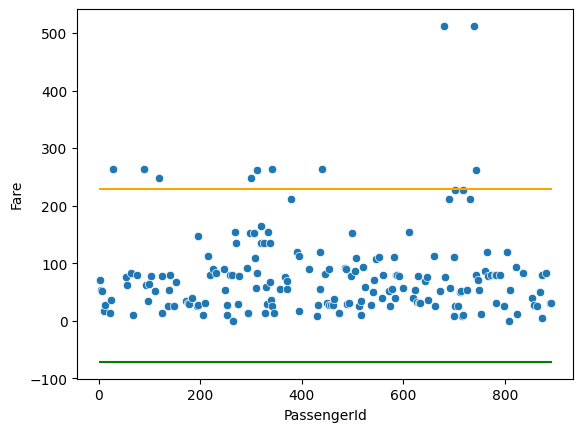

In [67]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Fare'])
sns.lineplot(x = dataOut['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dataOut['PassengerId'], y = xu, color = 'orange')

In [68]:
df_sd = dataOut[(dataOut['Fare']>=xl) & (dataOut['Fare']<=xu)]

df_sd[['Fare']].describe()

,Fare
count,173.000000
mean,65.624751
std,46.153119
min,0.000000
25%,29.700000
50%,56.929200
75%,83.158300
max,227.525000


In [69]:
dataOut['Fare_sd'] = np.where(
    dataOut['Fare']<xl,
    xl,
    np.where(
        dataOut['Fare']>xu,
        xu,
        dataOut['Fare']
    )
)
dataOut[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,183.000000,183.000000
mean,78.959191,74.584493
std,75.314418,58.390871
min,0.000000,0.000000
25%,30.000000,30.000000
50%,61.175000,61.175000
75%,90.000000,90.000000
max,512.329200,229.588027


##### Standard deviation approach - SibSp

In [70]:
f = 2
xl = dataOut['SibSp'].mean() - (dataOut['SibSp'].std() * f)
xu = dataOut['SibSp'].mean() + (dataOut['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -0.8333661305100681
Upper value: 1.7404699556466803


<AxesSubplot: xlabel='PassengerId', ylabel='SibSp'>

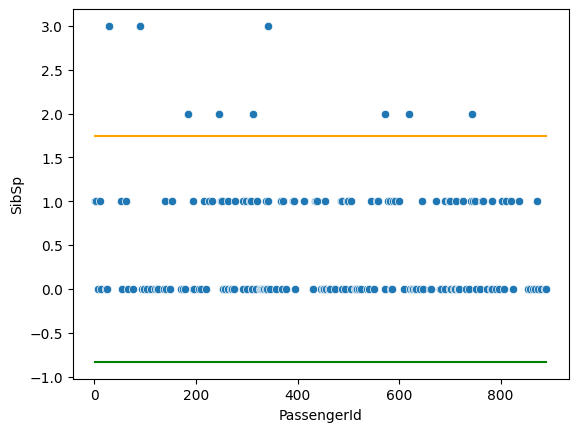

In [71]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['SibSp'])
sns.lineplot(x = dataOut['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dataOut['PassengerId'], y = xu, color = 'orange')

In [72]:
df_sd = dataOut[(dataOut['SibSp']>=xl) & (dataOut['SibSp']<=xu)]

df_sd[['SibSp']].describe()

,SibSp
count,174.000000
mean,0.356322
std,0.480294
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [73]:
dataOut['SibSp_sd'] = np.where(
    dataOut['SibSp']<xl,
    xl,
    np.where(
        dataOut['SibSp']>xu,
        xu,
        dataOut['SibSp']
    )
)
dataOut[['SibSp', 'SibSp_sd']].describe()

,SibSp,SibSp_sd
count,183.000000,183.000000
mean,0.453552,0.424395
std,0.643459,0.556198
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.740470


##### Standard deviation approach - Parch

In [74]:
f = 2
xl = dataOut['Parch'].mean() - (dataOut['Parch'].std() * f)
xu = dataOut['Parch'].mean() + (dataOut['Parch'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -1.0425998434772248
Upper value: 1.9059878216193014


<AxesSubplot: xlabel='PassengerId', ylabel='Parch'>

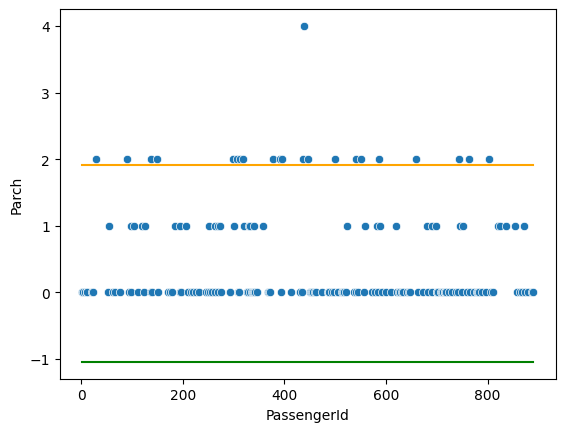

In [75]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Parch'])
sns.lineplot(x = dataOut['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dataOut['PassengerId'], y = xu, color = 'orange')

In [76]:
df_sd = dataOut[(dataOut['Parch']>=xl) & (dataOut['Parch']<=xu)]

df_sd[['Parch']].describe()

,Parch
count,161.000000
mean,0.204969
std,0.404938
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [77]:
dataOut['Parch_sd'] = np.where(
    dataOut['Parch']<xl,
    xl,
    np.where(
        dataOut['Parch']>xu,
        xu,
        dataOut['Parch']
    )
)
dataOut[['Parch', 'Parch_sd']].describe()

,Parch,Parch_sd
count,183.000000,183.000000
mean,0.431694,0.409463
std,0.737147,0.672210
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,1.905988


##### Percentile Approach - Age

In [78]:
pl = np.percentile(dataOut['Age'], 5)
pu = np.percentile(dataOut['Age'], 95)

<AxesSubplot: xlabel='PassengerId', ylabel='Age'>

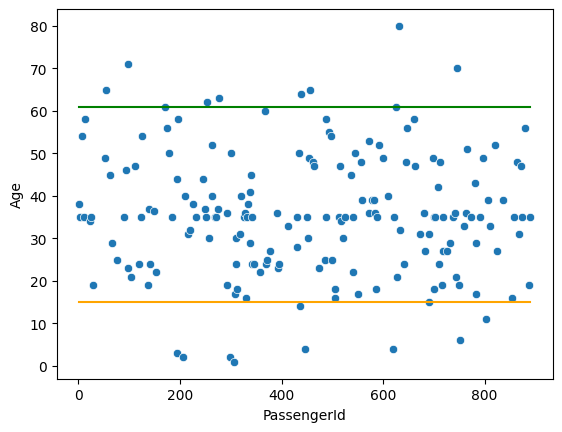

In [79]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Age'])
sns.lineplot(x = dataOut['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = dataOut['PassengerId'], y = pu, color = 'green')

In [80]:
df_sd = dataOut[(dataOut['Age']>=pl) & (dataOut['Age']<=pu)]
df_sd[['Age']].describe()

,Age
count,163.000000
mean,35.524540
std,11.067526
min,16.000000
25%,27.000000
50%,35.000000
75%,44.000000
max,60.000000


In [81]:
dataOut['Age_pct'] = np.where(
    dataOut['Age']<pl,
    pl,
    np.where(
        dataOut['Age']>pu,
        pu,
        dataOut['Age']
    )
)
dataOut[['Age', 'Age_sd', 'Age_pct']].describe()

,Age,Age_sd,Age_pct
count,183.000000,183.000000,183.000000
mean,35.597923,35.576827,35.795082
std,14.528916,13.870960,12.932786
min,0.920000,6.540091,15.100000
25%,25.000000,25.000000,25.000000
50%,35.000000,35.000000,35.000000
75%,46.500000,46.500000,46.500000
max,80.000000,64.655756,60.900000


##### Percentile Approach - Fare

In [82]:
pl = np.percentile(dataOut['Fare'], 5)
pu = np.percentile(dataOut['Fare'], 95)

<AxesSubplot: xlabel='PassengerId', ylabel='Fare'>

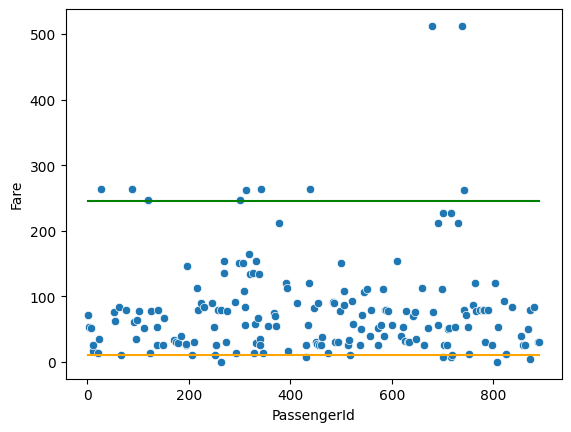

In [83]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Fare'])
sns.lineplot(x = dataOut['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = dataOut['PassengerId'], y = pu, color = 'green')

In [84]:
df_sd = dataOut[(dataOut['Fare']>=pl) & (dataOut['Fare']<=pu)]
df_sd[['Fare']].describe()

,Fare
count,165.000000
mean,68.507921
std,45.303589
min,10.500000
25%,30.500000
50%,57.979200
75%,83.475000
max,227.525000


In [85]:
dataOut['Fare_pct'] = np.where(
    dataOut['Fare']<pl,
    pl,
    np.where(
        dataOut['Fare']>pu,
        pu,
        dataOut['Fare']
    )
)
dataOut[['Fare', 'Fare_sd', 'Fare_pct']].describe()

,Fare,Fare_sd,Fare_pct
count,183.000000,183.000000,183.000000
mean,78.959191,74.584493,75.644913
std,75.314418,58.390871,60.561979
min,0.000000,0.000000,10.500000
25%,30.000000,30.000000,30.000000
50%,61.175000,61.175000,61.175000
75%,90.000000,90.000000,90.000000
max,512.329200,229.588027,245.521220


##### Percentile Approach - SibSp

In [86]:
pl = np.percentile(dataOut['SibSp'], 5)
pu = np.percentile(dataOut['SibSp'], 95)

<AxesSubplot: xlabel='PassengerId', ylabel='SibSp'>

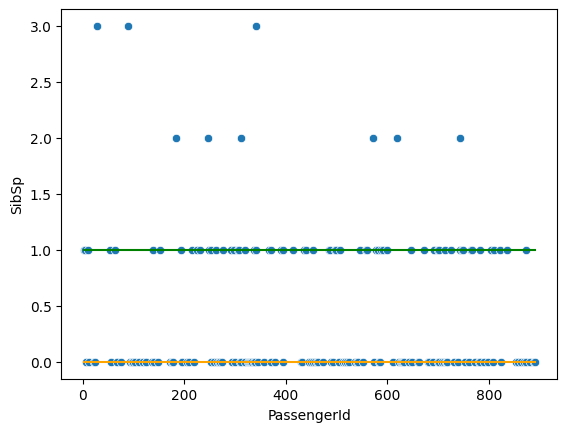

In [87]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['SibSp'])
sns.lineplot(x = dataOut['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = dataOut['PassengerId'], y = pu, color = 'green')

In [88]:
df_sd = dataOut[(dataOut['SibSp']>=pl) & (dataOut['SibSp']<=pu)]
df_sd[['SibSp']].describe()

,SibSp
count,174.000000
mean,0.356322
std,0.480294
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [89]:
dataOut['SibSp_pct'] = np.where(
    dataOut['SibSp']<pl,
    pl,
    np.where(
        dataOut['SibSp']>pu,
        pu,
        dataOut['SibSp']
    )
)
dataOut[['SibSp', 'SibSp_sd', 'SibSp_pct']].describe()

,SibSp,SibSp_sd,SibSp_pct
count,183.000000,183.000000,183.000000
mean,0.453552,0.424395,0.387978
std,0.643459,0.556198,0.488626
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,3.000000,1.740470,1.000000


##### Percentile Approach - Parch

In [90]:
pl = np.percentile(dataOut['Parch'], 5)
pu = np.percentile(dataOut['Parch'], 95)

<AxesSubplot: xlabel='PassengerId', ylabel='Parch'>

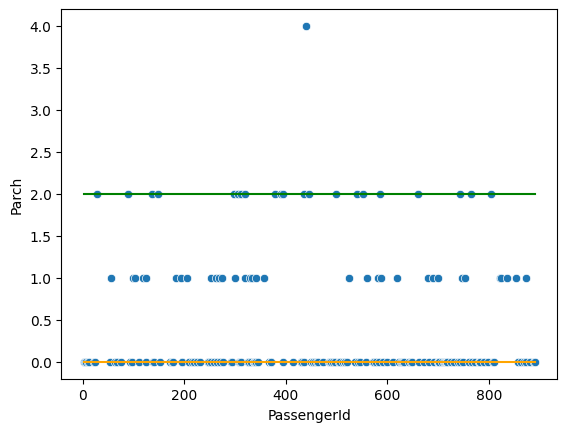

In [91]:
sns.scatterplot(x = dataOut['PassengerId'], y = dataOut['Parch'])
sns.lineplot(x = dataOut['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = dataOut['PassengerId'], y = pu, color = 'green')

In [92]:
df_sd = dataOut[(dataOut['Parch']>=pl) & (dataOut['Parch']<=pu)]
df_sd[['Parch']].describe()

,Parch
count,182.000000
mean,0.412088
std,0.689677
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [93]:
dataOut['Parch_pct'] = np.where(
    dataOut['Parch']<pl,
    pl,
    np.where(
        dataOut['Parch']>pu,
        pu,
        dataOut['Parch']
    )
)
dataOut[['Parch', 'Parch_sd', 'Parch_pct']].describe()

,Parch,Parch_sd,Parch_pct
count,183.000000,183.000000,183.000000
mean,0.431694,0.409463,0.420765
std,0.737147,0.672210,0.697724
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,4.000000,1.905988,2.000000


### 1.5.	Al comparar los métodos del inciso 4 contra “titanic.csv”, ¿Qué método (para cada columna) se acerca más a la realidad y por qué? 

In [94]:
dataCompleta = pd.read_csv('titanic.csv')

In [95]:
dataCompleta.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [96]:
dataOut.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_lm,Fare_lm,SibSp_lm,Parch_lm,Age_sd,Fare_sd,SibSp_sd,Parch_sd,Age_pct,Fare_pct,SibSp_pct,Parch_pct
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.597923,0.453552,0.431694,78.959191,35.597923,78.959191,0.253355,0.431694,35.576827,74.584493,0.424395,0.409463,35.795082,75.644913,0.387978,0.420765
std,247.052476,0.470725,0.515187,14.528916,0.643459,0.737147,75.314418,3.556026,9.094333,0.001641,0.269105,13.870960,58.390871,0.556198,0.672210,12.932786,60.561979,0.488626,0.697724
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,23.113258,51.165840,0.252199,0.149566,6.540091,0.000000,0.000000,0.000000,15.100000,10.500000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000,36.918054,72.135068,0.252199,0.256759,25.000000,30.000000,0.000000,0.000000,25.000000,30.000000,0.000000,0.000000
50%,457.000000,1.000000,1.000000,35.000000,0.000000,0.000000,61.175000,36.918054,79.333459,0.252199,0.368150,35.000000,61.175000,0.000000,0.000000,35.000000,61.175000,0.000000,0.000000
75%,676.000000,1.000000,1.000000,46.500000,1.000000,1.000000,90.000000,36.918054,85.592930,0.254749,0.471144,46.500000,90.000000,1.000000,1.000000,46.500000,90.000000,1.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,36.918054,100.665736,0.259849,1.980162,64.655756,229.588027,1.740470,1.905988,60.900000,245.521220,1.000000,2.000000


dataOut es la tabla resultado de los datos modelados mediante los modelos de regresión estableciendo anteriormente. dataCompleta es la tabla de los datos originales de Titanic.csv. 

Al comparar las variables estadísticas de ambas tablas se puede deducir que para las columnas con missin value el método que más se acerca son:
- SibSp : El método que mejor se acerca en torno a la mayoría de los estadísticos es Standard deviation approach. Esto porque al hacer alguna imputación de cualquier tipo movería la data hacia ese estadístico por lo tanto, era mejor tomar la desviación estándar.

- Age: En edad considero que el Standard deviation approach es la mejor opción ya que se adapta de mejor a la forma de la data original. No se alejan tanto los estadísticas con relación a los originales.

- Parch: En esta columna creo que es mejor la imputación por la mediana. Ya que los datos únicos no son muchos considero que la imputación por la mediana mantiene la forma de los datos al igual que la data original.

- Fare: Para esta variable es mejor Percentile approach ya que la data se comporta de mejor manera al segmentarla por lo tanto la modelación por los percentiles permite que los estadísticos se acerquen a la data original.

- Embarked y Sex: En el caso de estas variables al ser categóricas, la única opción era la imputación por la moda.

### 1.6.	Conclusiones

Originalmente se tenían 6 columnas con missing values. Las cuáles son: Sex, Age, SibSp, Parch, Fare y Embarked. Casi todas las columnas con missin value eran numéricas excepto Sex y Embarked que son categóricas.

Para el caso de las variables categóricas era mejor utilizar la imputación por la moda. En el caso de las variables númericas variaron en torno al método que adaptaba al comparar la data con la tabla original.

Para variables numéricas con gran dispersión me pareció que era mejor Standar deviation approach, esto para que la data no se moviera en base en algún dato en específico como la media y la moda. 

# Parte 2:

### 2.1.	Luego del pre-procesamiento de la data con Missing Values, normalice las columnas numéricas por los métodos:
    a.Standarization -> Promedio 0, std 1. De lo contrario está mal.
    b.MinMaxScaling -> scaling escalar [0,1]
    c.MaxAbsScaler -> Obviar


#### 2.1.1. Standarización

In [97]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
df_z = dataOut.copy()
for col in df_z.select_dtypes(include=['float', 'int']).columns:
    df_z[col+'_z'] = scaler.fit_transform(df_z[[col]])

In [125]:
df_z.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_lm_z,Parch_lm_z,Age_sd_z,Fare_sd_z,SibSp_sd_z,Parch_sd_z,Age_pct_z,Fare_pct_z,SibSp_pct_z,Parch_pct_z
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,38.0,1.0,0.0,PC 17599,71.2833,...,0.851565,-0.102198,0.175173,-0.056691,1.037732,-0.610801,0.170958,-0.072217,1.255972,-0.604708
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.851565,-0.344292,-0.041699,-0.368952,1.037732,-0.610801,-0.061647,-0.373283,1.255972,-0.604708
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,-0.706799,-0.360768,1.331827,-0.390204,-0.765121,-0.610801,1.411518,-0.393773,-0.796196,-0.604708
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,35.0,1.0,0.0,PP 9549,16.7000,...,0.851565,-0.828925,-0.041699,-0.994047,1.037732,-0.610801,-0.061647,-0.975969,1.255972,-0.604708
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,...,-0.706799,-0.697781,1.620990,-0.824894,-0.765121,-0.610801,1.721658,-0.812880,-0.796196,-0.604708


In [126]:
df_z.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_lm,Fare_lm,SibSp_lm,...,SibSp_lm_z,Parch_lm_z,Age_sd_z,Fare_sd_z,SibSp_sd_z,Parch_sd_z,Age_pct_z,Fare_pct_z,SibSp_pct_z,Parch_pct_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,1.191257,35.597923,0.453552,0.431694,78.959191,35.597923,78.959191,0.253355,...,5.356250e-14,-7.280151e-18,-2.086977e-16,8.736181e-17,-6.309464e-17,-4.853434e-17,1.941374e-17,2.426717e-17,-9.706868e-18,-6.794808e-17
std,247.052476,0.470725,0.515187,14.528916,0.643459,0.737147,75.314418,3.556026,9.094333,0.001641,...,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,23.113258,51.165840,0.252199,...,-7.067991e-01,-1.051270e+00,-2.099090e+00,-1.280836e+00,-7.651214e-01,-6.108010e-01,-1.604593e+00,-1.078625e+00,-7.961963e-01,-6.047079e-01
25%,263.500000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000,36.918054,72.135068,0.252199,...,-7.067991e-01,-6.518474e-01,-7.646078e-01,-7.656473e-01,-7.651214e-01,-6.108010e-01,-8.369966e-01,-7.557570e-01,-7.961963e-01,-6.047079e-01
50%,457.000000,1.000000,1.000000,35.000000,0.000000,0.000000,61.175000,36.918054,79.333459,0.252199,...,-7.067991e-01,-2.367804e-01,-4.169934e-02,-2.302805e-01,-7.651214e-01,-6.108010e-01,-6.164668e-02,-2.395828e-01,-7.961963e-01,-6.047079e-01
75%,676.000000,1.000000,1.000000,46.500000,1.000000,1.000000,90.000000,36.918054,85.592930,0.254749,...,8.515651e-01,1.469984e-01,7.896454e-01,2.647297e-01,1.037732e+00,8.809113e-01,8.300058e-01,2.376816e-01,1.255972e+00,8.324550e-01
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,36.918054,100.665736,0.259849,...,3.968293e+00,5.769930e+00,2.102140e+00,2.661868e+00,2.372691e+00,2.232384e+00,1.946510e+00,2.812695e+00,1.255972e+00,2.269618e+00


#### 2.1.2. MinMaxScaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()
df_norm = dataOut.copy()
for col in df_norm.select_dtypes(include=['float', 'int']).columns:
    df_norm[col+'_norm'] = scaler.fit_transform(df_norm[[col]])

In [129]:
df_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_lm_norm,Parch_lm_norm,Age_sd_norm,Fare_sd_norm,SibSp_sd_norm,Parch_sd_norm,Age_pct_norm,Fare_pct_norm,SibSp_pct_norm,Parch_pct_norm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,38.0,1.0,0.0,PC 17599,71.2833,...,0.333333,0.139136,0.541333,0.310484,0.574557,0.0,0.500000,0.258629,1.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.333333,0.103644,0.489711,0.231284,0.574557,0.0,0.434498,0.181260,1.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.000000,0.101229,0.816646,0.225894,0.000000,0.0,0.849345,0.175995,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,35.0,1.0,0.0,PP 9549,16.7000,...,0.333333,0.032596,0.489711,0.072739,0.574557,0.0,0.434498,0.026381,1.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,...,0.000000,0.051822,0.885474,0.115642,0.000000,0.0,0.936681,0.068292,0.0,0.0


In [130]:
df_norm.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_lm,Fare_lm,SibSp_lm,...,SibSp_lm_norm,Parch_lm_norm,Age_sd_norm,Fare_sd_norm,SibSp_sd_norm,Parch_sd_norm,Age_pct_norm,Fare_pct_norm,SibSp_pct_norm,Parch_pct_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.597923,0.453552,0.431694,78.959191,35.597923,78.959191,0.253355,...,0.151184,0.154118,0.499637,0.324862,0.243839,0.214830,0.451858,0.277187,0.387978,0.210383
std,247.052476,0.470725,0.515187,14.528916,0.643459,0.737147,75.314418,3.556026,9.094333,0.001641,...,0.214486,0.147004,0.238679,0.254329,0.319568,0.352683,0.282375,0.257687,0.488626,0.348862
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,23.113258,51.165840,0.252199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000,36.918054,72.135068,0.252199,...,0.000000,0.058556,0.317641,0.130669,0.000000,0.000000,0.216157,0.082971,0.000000,0.000000
50%,457.000000,1.000000,1.000000,35.000000,0.000000,0.000000,61.175000,36.918054,79.333459,0.252199,...,0.000000,0.119406,0.489711,0.266456,0.000000,0.000000,0.434498,0.215619,0.000000,0.000000
75%,676.000000,1.000000,1.000000,46.500000,1.000000,1.000000,90.000000,36.918054,85.592930,0.254749,...,0.333333,0.175668,0.687593,0.392007,0.574557,0.524662,0.685590,0.338267,1.000000,0.500000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,36.918054,100.665736,0.259849,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.2.	Compare los estadísticos que considere más importantes para su conclusión y compare contra la data completa de “titanic.csv”.


#### Normalización de la data completa, (titanic.csv).

In [131]:
# Standar Scaler
scaler = StandardScaler()
df_z_completa = dataCompleta.copy()
for col in df_z_completa.select_dtypes(include=['float', 'int']).columns:
    df_z_completa[col+'_z'] = scaler.fit_transform(df_z_completa[[col]])

In [132]:
# Min Max Scaler
scaler = MinMaxScaler()
df_norm_completa = dataCompleta.copy()
for col in df_norm_completa.select_dtypes(include=['float', 'int']).columns:
    df_norm_completa[col+'_norm'] = scaler.fit_transform(df_norm_completa[[col]])

In [133]:
# Tabla Completa estandarizada
df_z_completa.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId_z,Survived_z,Pclass_z,Age_z,SibSp_z,Parch_z,Fare_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.000000,4.853434e-17,3.882747e-17,-1.650168e-16,-1.456030e-17,3.882747e-17,1.140557e-16
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,1.002743,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,-1.840135,-1.431782e+00,-3.722562e-01,-2.227696e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,-0.778752,-1.431782e+00,-3.722562e-01,-7.483096e-01,-7.230443e-01,-6.317298e-01,-6.433299e-01
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.006632,6.984303e-01,-3.722562e-01,2.086869e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.895515,6.984303e-01,-3.722562e-01,7.579979e-01,8.336275e-01,6.970812e-01,1.486431e-01
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.764104,6.984303e-01,3.520480e+00,2.841189e+00,3.946971e+00,4.683514e+00,5.695465e+00


In [136]:
# Tabla Pre-procesada estandarizada
df_z.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_lm,Fare_lm,SibSp_lm,...,SibSp_lm_z,Parch_lm_z,Age_sd_z,Fare_sd_z,SibSp_sd_z,Parch_sd_z,Age_pct_z,Fare_pct_z,SibSp_pct_z,Parch_pct_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,1.191257,35.597923,0.453552,0.431694,78.959191,35.597923,78.959191,0.253355,...,5.356250e-14,-7.280151e-18,-2.086977e-16,8.736181e-17,-6.309464e-17,-4.853434e-17,1.941374e-17,2.426717e-17,-9.706868e-18,-6.794808e-17
std,247.052476,0.470725,0.515187,14.528916,0.643459,0.737147,75.314418,3.556026,9.094333,0.001641,...,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,23.113258,51.165840,0.252199,...,-7.067991e-01,-1.051270e+00,-2.099090e+00,-1.280836e+00,-7.651214e-01,-6.108010e-01,-1.604593e+00,-1.078625e+00,-7.961963e-01,-6.047079e-01
25%,263.500000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000,36.918054,72.135068,0.252199,...,-7.067991e-01,-6.518474e-01,-7.646078e-01,-7.656473e-01,-7.651214e-01,-6.108010e-01,-8.369966e-01,-7.557570e-01,-7.961963e-01,-6.047079e-01
50%,457.000000,1.000000,1.000000,35.000000,0.000000,0.000000,61.175000,36.918054,79.333459,0.252199,...,-7.067991e-01,-2.367804e-01,-4.169934e-02,-2.302805e-01,-7.651214e-01,-6.108010e-01,-6.164668e-02,-2.395828e-01,-7.961963e-01,-6.047079e-01
75%,676.000000,1.000000,1.000000,46.500000,1.000000,1.000000,90.000000,36.918054,85.592930,0.254749,...,8.515651e-01,1.469984e-01,7.896454e-01,2.647297e-01,1.037732e+00,8.809113e-01,8.300058e-01,2.376816e-01,1.255972e+00,8.324550e-01
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,36.918054,100.665736,0.259849,...,3.968293e+00,5.769930e+00,2.102140e+00,2.661868e+00,2.372691e+00,2.232384e+00,1.946510e+00,2.812695e+00,1.255972e+00,2.269618e+00


En general, el promedio de la estandarización es cercana a 0 y la desviación estándar es cercana a 1.

Para los valores en donde la data es más extensa como en Age y Fare, se puede observar que el comportamiento es puntos porcertuales positivo más cercanos a 0. Para variables como SibSp y Parch es puntos porcertuales negativos más cercanos a 0. 

Al compararlo con la tabla original de titanic.csv normalizada, se puede observar que el comportamient es bastante. Es método de normalización puede ser más exacto que el MinMaxScaling, sin embargo, la interpretación no es tan fácil por estar en notación científica.


In [135]:
# Tabla Completa MinMaxScaling
df_norm_completa.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId_norm,Survived_norm,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469,0.510547,0.672131,0.095628,0.439484,0.154827,0.118852,0.153578
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843,0.278212,0.470725,0.257593,0.197823,0.214720,0.188654,0.149021
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.294482,0.000000,0.000000,0.291856,0.000000,0.000000,0.057971
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.512387,1.000000,0.000000,0.443601,0.000000,0.000000,0.111257
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,0.759009,1.000000,0.000000,0.589024,0.333333,0.250000,0.175668
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Tabla pre-procesada MinMaxScaling
df_norm.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_lm,Fare_lm,SibSp_lm,...,SibSp_lm_norm,Parch_lm_norm,Age_sd_norm,Fare_sd_norm,SibSp_sd_norm,Parch_sd_norm,Age_pct_norm,Fare_pct_norm,SibSp_pct_norm,Parch_pct_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.597923,0.453552,0.431694,78.959191,35.597923,78.959191,0.253355,...,0.151184,0.154118,0.499637,0.324862,0.243839,0.214830,0.451858,0.277187,0.387978,0.210383
std,247.052476,0.470725,0.515187,14.528916,0.643459,0.737147,75.314418,3.556026,9.094333,0.001641,...,0.214486,0.147004,0.238679,0.254329,0.319568,0.352683,0.282375,0.257687,0.488626,0.348862
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,23.113258,51.165840,0.252199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,25.000000,0.000000,0.000000,30.000000,36.918054,72.135068,0.252199,...,0.000000,0.058556,0.317641,0.130669,0.000000,0.000000,0.216157,0.082971,0.000000,0.000000
50%,457.000000,1.000000,1.000000,35.000000,0.000000,0.000000,61.175000,36.918054,79.333459,0.252199,...,0.000000,0.119406,0.489711,0.266456,0.000000,0.000000,0.434498,0.215619,0.000000,0.000000
75%,676.000000,1.000000,1.000000,46.500000,1.000000,1.000000,90.000000,36.918054,85.592930,0.254749,...,0.333333,0.175668,0.687593,0.392007,0.574557,0.524662,0.685590,0.338267,1.000000,0.500000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,36.918054,100.665736,0.259849,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Personalmente, me gusta más la normalización por MinMaxScaling, ya que los datos pasan a estar en una escala más comprensible a primera vista, no está en notación científica. 

En base a la comparación con la tabla completa de titanic.csv se puede deducir de mejor manera los modelos que mejor calcularon los valores para los missing values. Ya que así como en Age, se puede observar que los valores dados en la desviación estándar y el promedio para los métodos Standar deviation approach y Percentile approach son bastante similares a la tabla completa. 

En análisis es más claro ya que se puede analizar de forma porcentual.

*** Fin del Laboratorio ***